In [38]:
from btseg.processors.time_series_processor import TimeSeriesProcessor

In [39]:
ts_processor = TimeSeriesProcessor('C:/Users/Gilberto/Desktop/Gilberto/Projetos/btseg/data/Outdir',
                                   region=1,
                                   angles=360)
ts_processor

In [40]:
time_series = ts_processor.run()

In [41]:
ts_ = time_series.dropna()
ts_ = ts_.drop(['id'], axis=1)
ts_

,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,...,a_350,a_351,a_352,a_353,a_354,a_355,a_356,a_357,a_358,a_359
0,109.041277,113.15918,113.282832,108.55874,106.794195,105.076163,103.406963,102.771591,103.16007,103.812331,...,72.532751,102.420701,99.984999,99.724621,99.503769,100.31949,102.176318,104.076895,107.004673,107.004673
1,62.072538,64.195015,65.375837,66.483081,66.753277,67.082039,67.468511,67.911707,68.154237,68.680419,...,66.490601,66.098411,61.66036,60.530984,60.299254,60.207973,60.074953,60.033324,60.0,61.032778
2,91.049437,90.088845,89.202018,89.274856,88.45903,87.572827,87.692645,86.833173,87.132084,86.313383,...,92.655275,92.541882,92.347171,92.26592,92.135769,92.086915,92.0489,92.005435,92.005435,92.021737
3,3.0,3.0,3.0,3.0,7.211103,7.211103,7.211103,7.211103,8.602325,8.602325,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,39.115214,39.204592,39.319207,39.458839,39.623226,39.812058,40.024992,40.521599,40.521599,39.849718,...,41.593269,41.593269,40.311289,40.199502,39.115214,39.051248,39.012818,39.0,39.012818,39.051248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,74.060786,74.168727,74.330344,73.552702,73.824115,72.18033,68.44706,65.734314,65.253352,65.802736,...,78.854296,78.447435,78.089692,77.781746,77.52419,77.317527,76.10519,75.059976,74.0,74.006756
146,92.0489,91.197588,87.367042,84.480767,81.743501,73.979727,73.348483,73.756356,74.215901,74.726167,...,69.42622,70.035705,70.859015,72.56032,72.443081,73.24616,76.164296,80.05623,86.005814,91.005494
147,87.051709,87.14356,87.367042,87.572827,86.833173,86.145226,85.510233,86.122006,85.615419,84.899941,...,85.906926,85.510233,86.145226,86.833173,87.572827,87.367042,87.206651,87.051709,87.005747,87.005747
148,17.262677,17.464249,17.720045,17.720045,18.027756,18.027756,18.384776,18.788294,19.235384,19.235384,...,19.416488,17.117243,17.117243,17.029386,17.029386,17.0,17.0,17.029386,17.117243,17.117243


In [42]:
ts_.to_csv('./experiment_region_1.csv', index=False)

In [43]:
X = []
for row in ts_.values:
    X.append(list(row))

## Model

In [44]:
import pandas as pd
import numpy as np
import DBCV
from dtaidistance import dtw
from dtaidistance import ed
from btseg.clustering.hdbscan_clustering import HDBSCANClusterer

In [45]:
ts_ = pd.read_csv('./experiment_region_1.csv')
X = ts_.values

In [46]:
hdbscan = HDBSCANClusterer(min_cluster_samples=5, min_samples=3, metric='dtw')
hdbscan.model

HDBSCAN(cluster_selection_method='leaf', metric='precomputed', min_samples=3)

In [47]:
hdbscan.fit(X)

In [48]:
hdbscan.model.probabilities_

array([0.        , 0.        , 0.        , 1.        , 0.77897737,
       0.        , 0.        , 0.82520005, 1.        , 1.        ,
       1.        , 0.67514087, 0.96738398, 0.        , 1.        ,
       0.        , 1.        , 0.74385335, 0.        , 0.86149483,
       0.77095744, 0.76685987, 0.        , 0.        , 0.91139363,
       0.        , 0.53081882, 0.86859683, 0.79601572, 0.        ,
       0.82741427, 0.91139363, 0.        , 0.        , 0.        ,
       0.91209869, 0.69911481, 0.        , 0.        , 0.55067713,
       0.        , 0.        , 0.        , 1.        , 0.77809809,
       1.        , 1.        , 0.77996932, 0.        , 0.        ,
       0.87712428, 0.        , 0.        , 0.7803739 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.7924717 ,
       0.85125606, 0.        , 0.84669231, 0.        , 0.69530179,
       0.        , 0.66442716, 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.     

In [49]:
out_labels = hdbscan.model.labels_
out_labels

array([-1, -1, -1,  2,  1, -1, -1,  1,  0,  1,  1,  2,  2, -1,  1, -1,  0,
        1, -1,  0,  1,  1, -1, -1,  1, -1,  2,  0,  0, -1,  1,  1, -1, -1,
       -1,  2,  1, -1, -1,  2, -1, -1, -1,  2,  1,  0,  0,  1, -1, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1,  2,  1, -1,  1, -1,  1, -1,  2, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1,  0,  0, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1,  2, -1, -1,  0, -1,  1, -1, -1, -1,  1,
       -1,  2, -1,  0,  1,  1,  0,  1, -1,  1, -1,  0,  1, -1,  2,  1, -1,
       -1,  1, -1, -1,  2, -1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1,  2, -1,  0,  1, -1,  1, -1,  0, -1, -1],
      dtype=int64)

In [50]:
np.unique(out_labels, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64), array([81, 17, 38, 14], dtype=int64))

In [51]:
result_df = pd.DataFrame({
    'id': list(range(len(ts_))),
    'group': out_labels,
    'proba': hdbscan.model.probabilities_
})

result_df[result_df['group'] == 2].sort_values('proba', ascending=False).head()

,id,group,proba
3,3,2,1.0
43,43,2,1.0
92,92,2,1.0
103,103,2,1.0
140,140,2,1.0


In [119]:
import matplotlib.pyplot as plt

def plot(arr, X):
    x = list(range(720))
    
    fig = plt.figure(figsize=(12, 4))
    for i in arr:
        plt.plot(x, X[i], color='steelblue')
        
    plt.ylim((0, 160))
    plt.show()

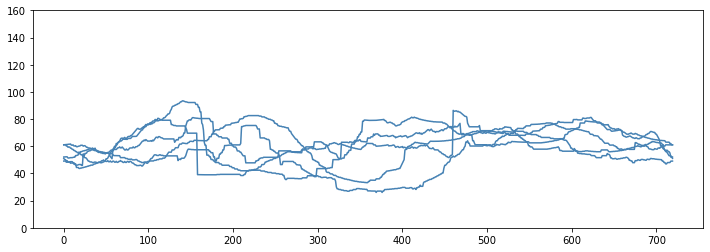

In [120]:
plot([75, 9, 14, 24, 70], X)

In [121]:
result_df[result_df['group'] == 0].sort_values('proba', ascending=False).head()

,id,group,proba
3,3,0,1.0
12,12,0,1.0
43,43,0,1.0
92,92,0,1.0
123,123,0,1.0


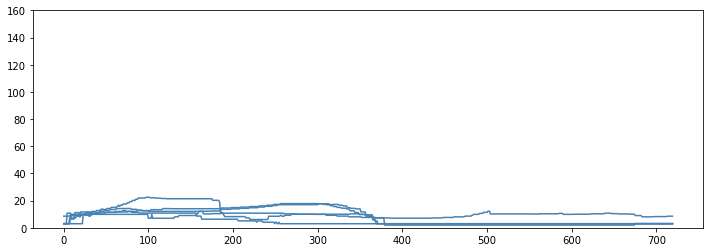

In [122]:
plot([3, 12, 43, 92, 123], X)

In [123]:
result_df[result_df['group'] == 1].sort_values('proba', ascending=False).head()

,id,group,proba
8,8,1,1.0
16,16,1,1.0
45,45,1,1.0
46,46,1,1.0
108,108,1,1.0


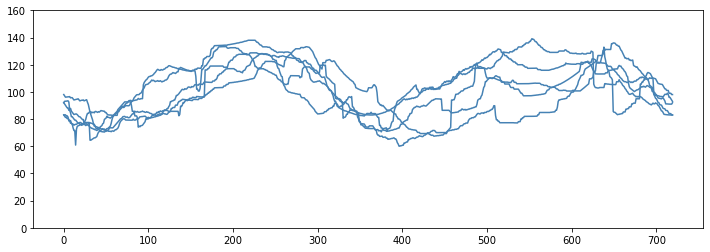

In [124]:
plot([8, 16, 45, 46, 108], X)

In [18]:
X

array([[109.04127659, 110.07270325, 113.15917992, ..., 107.0046728 ,
        107.0046728 , 108.01851693],
       [ 62.07253821,  63.12685641,  64.19501538, ...,  60.00833275,
         61.03277808,  62.07253821],
       [ 91.04943712,  90.08884504,  90.08884504, ...,  92.00543462,
         92.02173656,  91.04943712],
       ...,
       [ 87.05170877,  87.09190548,  87.14355972, ...,  87.        ,
         87.00574694,  87.02298547],
       [ 17.2626765 ,  17.4642492 ,  17.4642492 , ...,  17.11724277,
         17.11724277,  17.2626765 ],
       [ 68.0661443 ,  68.11754546,  68.18357573, ...,  68.00735254,
         68.02940541,  68.02940541]])

In [20]:
dtw.distance(X[0], X[1])

712.4893873935732

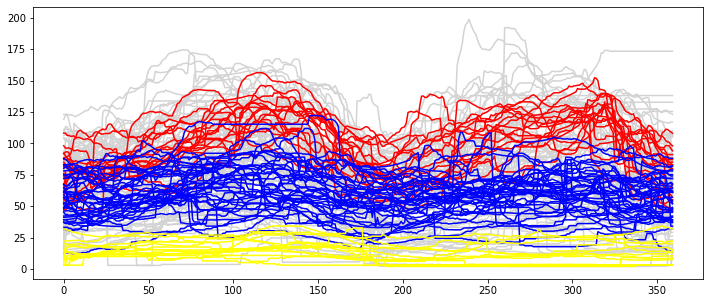

In [62]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

labeled_time_series = {
    key: [] for key in np.unique(out_labels)
}

label_colors = {
    -1: 'lightgray',
    0: 'red',
    1: 'blue',
    2: 'yellow'
}

for index, label in enumerate(out_labels):
    labeled_time_series[label].append(X[index])

for label, values in labeled_time_series.items():
#     print(values)
    for value in values:
        plt.plot(list(range(360)), value, color=label_colors[label])

plt.show()

In [24]:
def distance_function(points_i, points_j):
    return dtw.distance_fast(points_i, points_j)

In [36]:
len(X[0])

720

In [32]:
from scipy.spatial.distance import euclidean
dbcv_score = DBCV.DBCV(X, out_labels, dist_function=euclidean)

C:\Users\Gilberto\Anaconda3\lib\site-packages\DBCV\DBCV.py:58: RuntimeWarning: divide by zero encountered in double_scalars
  core_dist = (numerator / (n_neighbors - 1)) ** (-1/n_features)
C:\Users\Gilberto\Anaconda3\lib\site-packages\DBCV\DBCV.py:217: RuntimeWarning: invalid value encountered in double_scalars
  cluster_validity = numerator / denominator


In [33]:
dbcv_score

nan